<a href="https://colab.research.google.com/github/Salva13s/Entrega_final/blob/main/Redes_Clasicas_IMG_SinFondo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libreria necesaria para utilizar el drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Ruta del drive**

In [ ]:
ruta_principal = "/content/drive/MyDrive/tópico 1 ml/fondo_blanco_train"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

**Creación de carpetas test y train dentro del colab para almacenar imágenes y trabajar con ellas**

In [ ]:
import shutil

ruta_train = os.path.join(ruta_principal, "train")
ruta_test = os.path.join(ruta_principal, "test")

carpeta_destino_train = "/content/dataset/train"

carpeta_destino_test = "/content/dataset/test"


if not os.path.exists(carpeta_destino_train):
    os.makedirs(carpeta_destino_train)
if not os.path.exists(carpeta_destino_test):
    os.makedirs(carpeta_destino_test)


for letra in os.listdir(ruta_train):
    ruta_letra = os.path.join(ruta_train, letra)
    for imagen in os.listdir(ruta_letra):
        ruta_imagen = os.path.join(ruta_letra, imagen)
        carpeta_letra_destino = os.path.join(carpeta_destino_train, letra)
        if not os.path.exists(carpeta_letra_destino):
            os.makedirs(carpeta_letra_destino)
        shutil.copy(ruta_imagen, os.path.join(carpeta_letra_destino, imagen))


for letra in os.listdir(ruta_test):
    ruta_letra = os.path.join(ruta_test, letra)
    for imagen in os.listdir(ruta_letra):
        ruta_imagen = os.path.join(ruta_letra, imagen)
        carpeta_letra_destino = os.path.join(carpeta_destino_test, letra)
        if not os.path.exists(carpeta_letra_destino):
            os.makedirs(carpeta_letra_destino)
        shutil.copy(ruta_imagen, os.path.join(carpeta_letra_destino, imagen))

**Informacion de las imagenes (Tamaño y canal)**

In [ ]:
from PIL import Image

img_path = '/content/dataset/train/A/1.jpg' # <------ al cambiar la ruta podemos ver que las imagenes son todas distintas en tamaño

img = Image.open(img_path)

original_size = img.size
original_mode = img.mode

print(f'Tamaño original de la imagen: {original_size}')
print(f'Modo original de la imagen: {original_mode}')

img.show()

Tamaño original de la imagen: (775, 1032)
Modo original de la imagen: RGB


**Normalización y generadores de datos**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(480, 480),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(480, 480),
    batch_size=32,
    class_mode='categorical'
)

Found 176 images belonging to 21 classes.
Found 63 images belonging to 21 classes.


#**CNN Clásica**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

NUM_CLASSES = 21

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(480, 480, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',"AUC","TruePositives","TrueNegatives","FalsePositives","FalseNegatives"])

#early_stopping_callback = EarlyStopping(monitor='loss', patience=3)
#Entrenar el modelo
H = model.fit(train_generator, epochs=100, validation_data=test_generator)#, callbacks=[early_stopping_callback])


Epoch 1/100
6/6 [==============================] - 15s 1s/step - loss: 64.8746 - accuracy: 0.0625 - auc: 0.5070 - true_positives: 7.0000 - true_negatives: 3383.0000 - false_positives: 137.0000 - false_negatives: 169.0000 - val_loss: 13.7094 - val_accuracy: 0.0476 - val_auc: 0.5059 - val_true_positives: 3.0000 - val_true_negatives: 1200.0000 - val_false_positives: 60.0000 - val_false_negatives: 60.0000
Epoch 2/100
6/6 [==============================] - 4s 670ms/step - loss: 8.8768 - accuracy: 0.0625 - auc: 0.5322 - true_positives: 1.0000 - true_negatives: 3458.0000 - false_positives: 62.0000 - false_negatives: 175.0000 - val_loss: 3.2634 - val_accuracy: 0.0635 - val_auc: 0.4916 - val_true_positives: 0.0000e+00 - val_true_negatives: 1260.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 63.0000
Epoch 3/100
6/6 [==============================] - 5s 927ms/step - loss: 3.0518 - accuracy: 0.1307 - auc: 0.6228 - true_positives: 1.0000 - true_negatives: 3520.0000 - false_positives:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

#Diccionario que mapea las clases a las letras correspondientes
clase_a_letra = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',5: 'F', 6: 'H', 7: 'I', 8: 'K', 9: 'L', 10: 'M', 11: 'N', 12: 'O',13: 'P', 14: 'Q', 15: 'R', 16: 'T',
    17: 'U', 18: 'V', 19: 'W', 20: 'Y'}

**Predicciones CNN Clásica**

1/1 [==============================] - 0s 91ms/step


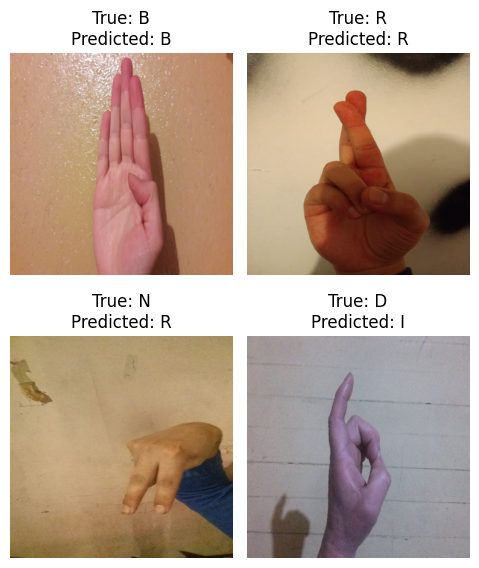

In [ ]:
correctly_predicted = []
incorrectly_predicted = []

for i in range(len(test_generator)):
    batch, labels = test_generator[i]
    predictions = model.predict(batch)

    for j in range(len(labels)):
        true_class = np.argmax(labels[j])
        predicted_class = np.argmax(predictions[j])

        if true_class == predicted_class:
            correctly_predicted.append((batch[j], true_class))
        else:
            incorrectly_predicted.append((batch[j], true_class, predicted_class))

plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(2, 5, i + 1)
    plt.imshow(correctly_predicted[i][0])
    true_letter = clase_a_letra[correctly_predicted[i][1]]
    plt.title(f'True: {clase_a_letra[correctly_predicted[i][1]]}\nPredicted: {clase_a_letra[correctly_predicted[i][1]]}')
    plt.axis('off')


for i in range(2):
    plt.subplot(2, 5, i + 6)
    plt.imshow(incorrectly_predicted[i][0])
    true_letter = clase_a_letra[incorrectly_predicted[i][1]]
    predicted_letter = clase_a_letra[incorrectly_predicted[i][2]]
    plt.title(f'True: {true_letter}\nPredicted: {predicted_letter}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
history_dict = H.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


**Metricas CNN Clásica**

In [ ]:
print("Perdida en set de entrenamiento",history_dict["loss"][len(history_dict["loss"])-1])
print("Perdida en set de validacion",history_dict["val_loss"][len(history_dict["val_loss"])-1])
print("------------------------------------------------------------------------------------")
print("Accuracy en set de entrenamiento",history_dict["accuracy"][len(history_dict["accuracy"])-1])
print("Accuracy en set de validacion",history_dict["val_accuracy"][len(history_dict["val_accuracy"])-1])
print("------------------------------------------------------------------------------------")
print("Auc en set de entrenamiento",history_dict["auc"][len(history_dict["auc"])-1])
print("Auc en set de validacion",history_dict["val_auc"][len(history_dict["val_auc"])-1])


Perdida en set de entrenamiento 6.583596245945955e-07
Perdida en set de validacion 8.789381980895996
------------------------------------------------------------------------------------
Accuracy en set de entrenamiento 1.0
Accuracy en set de validacion 0.0317460335791111
------------------------------------------------------------------------------------
Auc en set de entrenamiento 1.0
Auc en set de validacion 0.4948412775993347


****

**Datos para la matriz de confusión**


In [ ]:
print("Verdaderos negativos set entrenamiento: ",history_dict["true_negatives"][len(history_dict["true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos negativos set de testeo: ",history_dict["val_true_negatives"][len(history_dict["val_true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set entrenamiento: ",history_dict["true_positives"][len(history_dict["true_positives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set de testeo: ",history_dict["val_true_positives"][len(history_dict["val_true_positives"])-1])
print("------------------------------------------------")
print("Falsos negativos set entrenamiento: ",history_dict["false_negatives"][len(history_dict["false_negatives"])-1])
print("------------------------------------------------")
print("Falsos negativos set de testeo: ",history_dict["val_false_negatives"][len(history_dict["val_false_negatives"])-1])
print("------------------------------------------------")
print("Falsos positivos set entrenamiento: ",history_dict["false_positives"][len(history_dict["false_positives"])-1])
print("------------------------------------------------")
print("Falsos positivos set de testeo: ",history_dict["val_false_positives"][len(history_dict["val_false_positives"])-1])

Verdaderos negativos set entrenamiento:  3520.0
------------------------------------------------
Verdaderos negativos set de testeo:  1215.0
------------------------------------------------
Verdaderos positivos set entrenamiento:  176.0
------------------------------------------------
Verdaderos positivos set de testeo:  0.0
------------------------------------------------
Falsos negativos set entrenamiento:  0.0
------------------------------------------------
Falsos negativos set de testeo:  63.0
------------------------------------------------
Falsos positivos set entrenamiento:  0.0
------------------------------------------------
Falsos positivos set de testeo:  45.0




*   **Gráfico CNN Clásica entrenamiento y validacion accuracy**
*   **Gráfico CNN Clásica Entrenamiento y validación auc**  
*   **Gráfico CNN Clásica Entrenamiento y validación loss**  




<Figure size 640x480 with 0 Axes>

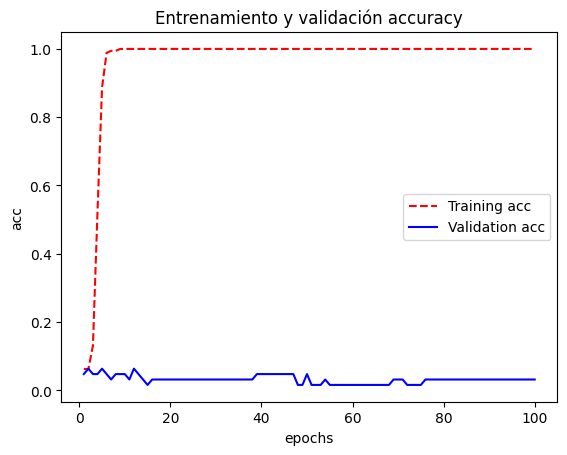

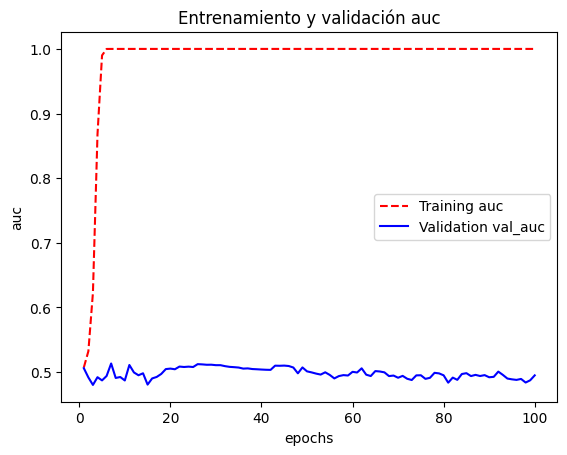

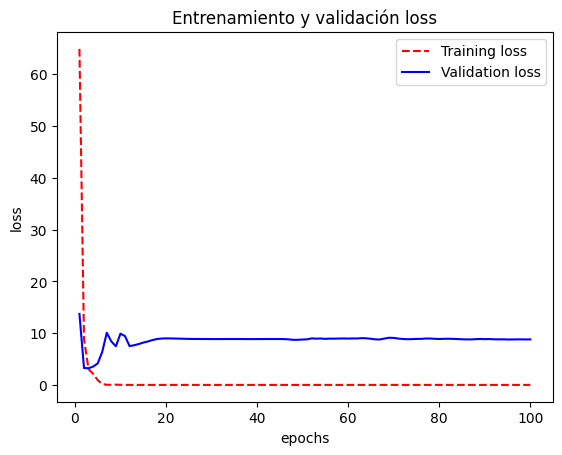

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc      = H.history[     'accuracy' ]
val_acc  = H.history[ 'val_accuracy' ]
loss     = H.history[    'loss' ]
val_loss = H.history['val_loss' ]
auc = H.history["auc"]
val_auc = H.history['val_auc']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Entrenamiento y validación accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     auc, 'r--', label='Training auc'  )
plt.plot ( epochs, val_auc,  'b', label='Validation val_auc')
plt.title ('Entrenamiento y validación auc')
plt.ylabel('auc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' , label='Training loss'  )
plt.plot ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Entrenamiento y validación loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

#**VGG16**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(480, 480, 3))


base_model.trainable = False


model2 = keras.Sequential([
    base_model,
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', "AUC", "TruePositives", "TrueNegatives", "FalsePositives", "FalseNegatives"])


H2 = model2.fit(train_generator, epochs=100, validation_data=test_generator)


Epoch 1/100
6/6 [==============================] - 46s 6s/step - loss: 3.1463 - accuracy: 0.0625 - auc: 0.4894 - true_positives: 0.0000e+00 - true_negatives: 3520.0000 - false_positives: 0.0000e+00 - false_negatives: 176.0000 - val_loss: 3.0641 - val_accuracy: 0.0476 - val_auc: 0.5084 - val_true_positives: 0.0000e+00 - val_true_negatives: 1260.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 63.0000
Epoch 2/100
6/6 [==============================] - 6s 992ms/step - loss: 3.0776 - accuracy: 0.0341 - auc: 0.4867 - true_positives: 0.0000e+00 - true_negatives: 3520.0000 - false_positives: 0.0000e+00 - false_negatives: 176.0000 - val_loss: 3.0450 - val_accuracy: 0.0635 - val_auc: 0.5136 - val_true_positives: 0.0000e+00 - val_true_negatives: 1260.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 63.0000
Epoch 3/100
6/6 [==============================] - 9s 2s/step - loss: 3.0398 - accuracy: 0.0227 - auc: 0.5374 - true_positives: 0.0000e+00 - true_negatives: 3520.0000

**Predicciones VGG-16**

1/1 [==============================] - 0s 95ms/step


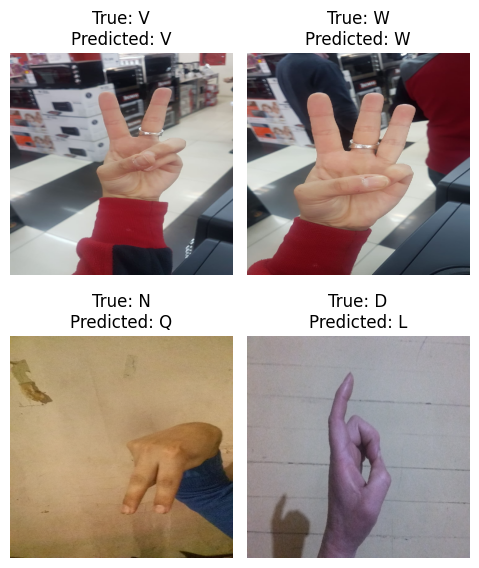

In [ ]:
correctly_predicted = []
incorrectly_predicted = []

for i in range(len(test_generator)):
    batch, labels = test_generator[i]
    predictions = model2.predict(batch)

    for j in range(len(labels)):
        true_class = np.argmax(labels[j])
        predicted_class = np.argmax(predictions[j])

        if true_class == predicted_class:
            correctly_predicted.append((batch[j], true_class))
        else:
            incorrectly_predicted.append((batch[j], true_class, predicted_class))


plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(2, 5, i + 1)
    plt.imshow(correctly_predicted[i][0])
    true_letter = clase_a_letra[correctly_predicted[i][1]]
    plt.title(f'True: {clase_a_letra[correctly_predicted[i][1]]}\nPredicted: {clase_a_letra[correctly_predicted[i][1]]}')
    plt.axis('off')


for i in range(2):
    plt.subplot(2, 5, i + 6)
    plt.imshow(incorrectly_predicted[i][0])
    true_letter = clase_a_letra[incorrectly_predicted[i][1]]
    predicted_letter = clase_a_letra[incorrectly_predicted[i][2]]
    plt.title(f'True: {true_letter}\nPredicted: {predicted_letter}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
history_dict2 = H2.history
print(history_dict2.keys())

dict_keys(['loss', 'accuracy', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


**Métricas VGG-16**

In [ ]:
print("Perdida en set de entrenamiento",history_dict2["loss"][len(history_dict2["loss"])-1])
print("Perdida en set de validacion",history_dict2["val_loss"][len(history_dict2["val_loss"])-1])
print("------------------------------------------------------------------------------------")
print("Accuracy en set de entrenamiento",history_dict2["accuracy"][len(history_dict2["accuracy"])-1])
print("Accuracy en set de validacion",history_dict2["val_accuracy"][len(history_dict2["val_accuracy"])-1])
print("------------------------------------------------------------------------------------")
print("Auc en set de entrenamiento",history_dict2["auc"][len(history_dict2["auc"])-1])
print("Auc en set de validacion",history_dict2["val_auc"][len(history_dict2["val_auc"])-1])

Perdida en set de entrenamiento 0.004980260506272316
Perdida en set de validacion 3.990429639816284
------------------------------------------------------------------------------------
Accuracy en set de entrenamiento 1.0
Accuracy en set de validacion 0.2063492089509964
------------------------------------------------------------------------------------
Auc en set de entrenamiento 1.0
Auc en set de validacion 0.7334404587745667


**Datos para la matriz de confusión**

In [ ]:
print("Verdaderos negativos set entrenamiento: ",history_dict2["true_negatives"][len(history_dict2["true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos negativos set de testeo: ",history_dict2["val_true_negatives"][len(history_dict2["val_true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set entrenamiento: ",history_dict2["true_positives"][len(history_dict2["true_positives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set de testeo: ",history_dict2["val_true_positives"][len(history_dict2["val_true_positives"])-1])
print("------------------------------------------------")
print("Falsos negativos set entrenamiento: ",history_dict2["false_negatives"][len(history_dict2["false_negatives"])-1])
print("------------------------------------------------")
print("Falsos negativos set de testeo: ",history_dict2["val_false_negatives"][len(history_dict2["val_false_negatives"])-1])
print("------------------------------------------------")
print("Falsos positivos set entrenamiento: ",history_dict2["false_positives"][len(history_dict2["false_positives"])-1])
print("------------------------------------------------")
print("Falsos positivos set de testeo: ",history_dict2["val_false_positives"][len(history_dict2["val_false_positives"])-1])

Verdaderos negativos set entrenamiento:  3520.0
------------------------------------------------
Verdaderos negativos set de testeo:  1231.0
------------------------------------------------
Verdaderos positivos set entrenamiento:  176.0
------------------------------------------------
Verdaderos positivos set de testeo:  12.0
------------------------------------------------
Falsos negativos set entrenamiento:  0.0
------------------------------------------------
Falsos negativos set de testeo:  51.0
------------------------------------------------
Falsos positivos set entrenamiento:  0.0
------------------------------------------------
Falsos positivos set de testeo:  29.0



*   **Gráfico VGG16 entrenamiento y validacion accuracy**
*   **Gráfico VGG16 entrenamiento y validacion auc**
*   **Gráfico VGG16 entrenamiento y validacion loss**

<Figure size 640x480 with 0 Axes>

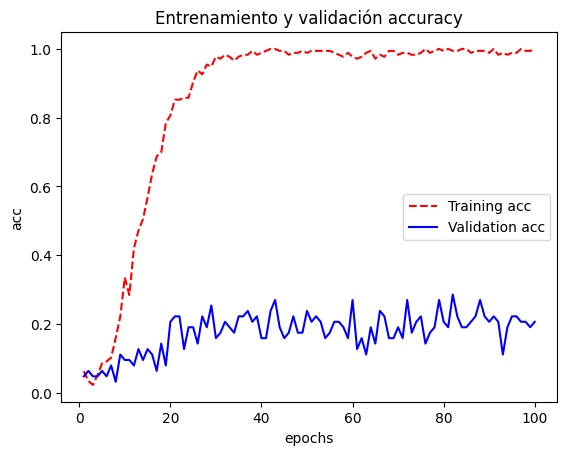

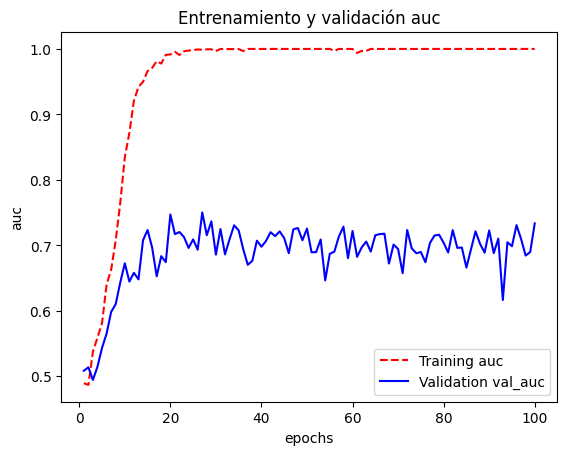

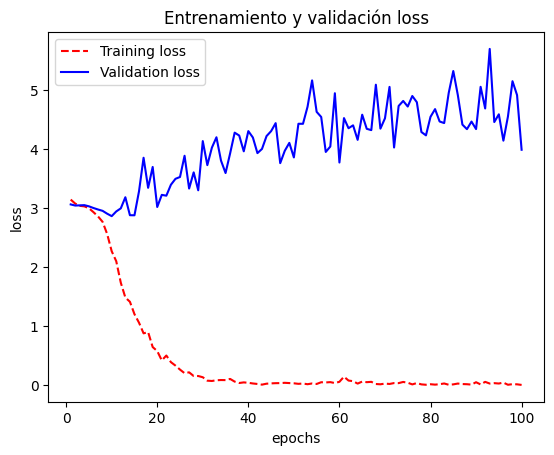

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc      = H2.history[     'accuracy' ]
val_acc  = H2.history[ 'val_accuracy' ]
loss     = H2.history[    'loss' ]
val_loss = H2.history['val_loss' ]
auc = H2.history["auc"]
val_auc = H2.history['val_auc']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Entrenamiento y validación accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     auc, 'r--', label='Training auc'  )
plt.plot ( epochs, val_auc,  'b', label='Validation val_auc')
plt.title ('Entrenamiento y validación auc')
plt.ylabel('auc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' , label='Training loss'  )
plt.plot ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Entrenamiento y validación loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

#**Ensamble VGG16 y ResNet**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
vgg_model = VGG16(include_top=False, weights='imagenet', input_shape=(480, 480, 3))

for layer in vgg_model.layers:
    layer.trainable = False


vgg_output = vgg_model.output
vgg_output = GlobalAveragePooling2D()(vgg_output)
vgg_output = Dense(256, activation='relu')(vgg_output)


resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(480, 480, 3))

for layer in resnet_model.layers:
    layer.trainable = False


resnet_output = resnet_model.output
resnet_output = GlobalAveragePooling2D()(resnet_output)
resnet_output = Dense(256, activation='relu')(resnet_output)

merged_output = tf.keras.layers.concatenate([vgg_output, resnet_output])

predictions = Dense(21, activation='softmax')(merged_output)

ensemble_model = Model(inputs=[vgg_model.input, resnet_model.input], outputs=predictions)

ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',"AUC","TruePositives","TrueNegatives","FalsePositives","FalseNegatives"])


**Normalización y generadores de data**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(480, 480),
    batch_size=32*21,
    class_mode='categorical'
)

train_generator_resnet = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(480, 480),
    batch_size=32*21,
    class_mode='categorical'
)

test_generator_vgg = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(480, 480),
    batch_size=32*21,
    class_mode='categorical'
)

test_generator_resnet = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(480, 480),
    batch_size=32*21,
    class_mode='categorical'
)


train_images_vgg, train_labels = train_generator_vgg.next()
train_images_resnet, _ = train_generator_resnet.next()
val_images_vgg, val_labels = test_generator_vgg.next()
val_images_resnet, _ = test_generator_resnet.next()
H3 = ensemble_model.fit([train_images_vgg, train_images_resnet],train_labels,epochs=100,validation_data=([val_images_vgg, val_images_resnet], val_labels))#, callbacks=[early_stopping_callback])

Found 176 images belonging to 21 classes.
Found 176 images belonging to 21 classes.
Found 63 images belonging to 21 classes.
Found 63 images belonging to 21 classes.
Epoch 1/100
6/6 [==============================] - 22s 3s/step - loss: 3.5907 - accuracy: 0.0341 - auc: 0.4775 - true_positives: 0.0000e+00 - true_negatives: 3520.0000 - false_positives: 0.0000e+00 - false_negatives: 176.0000 - val_loss: 3.4803 - val_accuracy: 0.0476 - val_auc: 0.5007 - val_true_positives: 0.0000e+00 - val_true_negatives: 1260.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 63.0000
Epoch 2/100
6/6 [==============================] - 8s 1s/step - loss: 3.3378 - accuracy: 0.0568 - auc: 0.5208 - true_positives: 0.0000e+00 - true_negatives: 3520.0000 - false_positives: 0.0000e+00 - false_negatives: 176.0000 - val_loss: 3.2159 - val_accuracy: 0.0476 - val_auc: 0.5039 - val_true_positives: 0.0000e+00 - val_true_negatives: 1260.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 63.0000
Epo

**Predicciones Ensamble (VGG-16 y ResNet)**

2/2 [==============================] - 1s 946ms/step


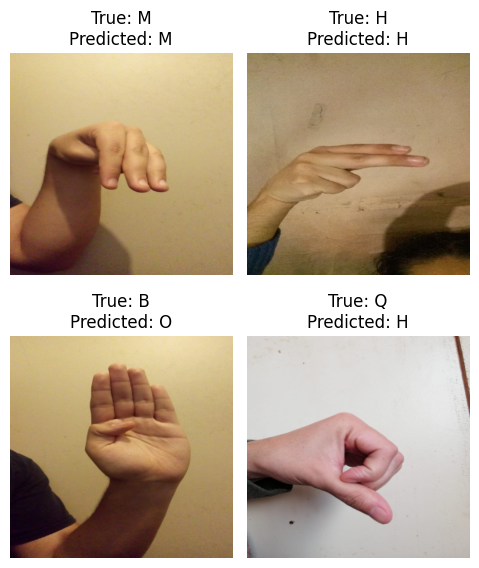

In [ ]:
correctly_predicted = []
incorrectly_predicted = []

for i in range(len(test_generator_vgg)):
    batch_vgg, labels = test_generator_vgg[i]
    batch_resnet, _ = test_generator_resnet[i]

    predictions = ensemble_model.predict([batch_vgg, batch_resnet])

    for j in range(len(labels)):
        true_class = np.argmax(labels[j])
        predicted_class = np.argmax(predictions[j])

        if true_class == predicted_class:
            correctly_predicted.append((batch_vgg[j], true_class))
        else:
            incorrectly_predicted.append((batch_vgg[j], true_class, predicted_class))


plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(2, 5, i + 1)
    plt.imshow(correctly_predicted[i][0])
    true_letter = clase_a_letra[correctly_predicted[i][1]]
    plt.title(f'True: {clase_a_letra[correctly_predicted[i][1]]}\nPredicted: {clase_a_letra[correctly_predicted[i][1]]}')
    plt.axis('off')


for i in range(2):
    plt.subplot(2, 5, i + 6)
    plt.imshow(incorrectly_predicted[i][0])
    true_letter = clase_a_letra[incorrectly_predicted[i][1]]
    predicted_letter = clase_a_letra[incorrectly_predicted[i][2]]
    plt.title(f'True: {true_letter}\nPredicted: {predicted_letter}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
history_dict3 = H3.history
print(history_dict3.keys())

dict_keys(['loss', 'accuracy', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


**Métricas ensamble VGG-16 y ResNet**

In [ ]:
print("Perdida en set de entrenamiento",history_dict3["loss"][len(history_dict3["loss"])-1])
print("Perdida en set de validacion",history_dict3["val_loss"][len(history_dict3["val_loss"])-1])
print("------------------------------------------------------------------------------------")
print("Accuracy en set de entrenamiento",history_dict3["accuracy"][len(history_dict3["accuracy"])-1])
print("Accuracy en set de validacion",history_dict3["val_accuracy"][len(history_dict3["val_accuracy"])-1])
print("------------------------------------------------------------------------------------")
print("Auc en set de entrenamiento",history_dict3["auc"][len(history_dict3["auc"])-1])
print("Auc en set de validacion",history_dict3["val_auc"][len(history_dict3["val_auc"])-1])

Perdida en set de entrenamiento 0.6027879118919373
Perdida en set de validacion 3.615185499191284
------------------------------------------------------------------------------------
Accuracy en set de entrenamiento 0.9431818127632141
Accuracy en set de validacion 0.0634920671582222
------------------------------------------------------------------------------------
Auc en set de entrenamiento 0.9980185627937317
Auc en set de validacion 0.6555744409561157


**Datos para la matriz de confusión**


In [ ]:
print("Verdaderos negativos set entrenamiento: ",history_dict3["true_negatives"][len(history_dict3["true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos negativos set de testeo: ",history_dict3["val_true_negatives"][len(history_dict3["val_true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set entrenamiento: ",history_dict3["true_positives"][len(history_dict3["true_positives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set de testeo: ",history_dict3["val_true_positives"][len(history_dict3["val_true_positives"])-1])
print("------------------------------------------------")
print("Falsos negativos set entrenamiento: ",history_dict3["false_negatives"][len(history_dict3["false_negatives"])-1])
print("------------------------------------------------")
print("Falsos negativos set de testeo: ",history_dict3["val_false_negatives"][len(history_dict3["val_false_negatives"])-1])
print("------------------------------------------------")
print("Falsos positivos set entrenamiento: ",history_dict3["false_positives"][len(history_dict3["false_positives"])-1])
print("------------------------------------------------")
print("Falsos positivos set de testeo: ",history_dict3["val_false_positives"][len(history_dict3["val_false_positives"])-1])

Verdaderos negativos set entrenamiento:  3520.0
------------------------------------------------
Verdaderos negativos set de testeo:  1252.0
------------------------------------------------
Verdaderos positivos set entrenamiento:  120.0
------------------------------------------------
Verdaderos positivos set de testeo:  0.0
------------------------------------------------
Falsos negativos set entrenamiento:  56.0
------------------------------------------------
Falsos negativos set de testeo:  63.0
------------------------------------------------
Falsos positivos set entrenamiento:  0.0
------------------------------------------------
Falsos positivos set de testeo:  8.0



*   **Gráfico ensamble (VGG-16 y Resnet) Entrenamiento y validacion accuracy por epochs**
*   **Gráfico ensamble (VGG-16 y Resnet) Entrenamiento y validación auc por epochs**
*   **Gráfico ensamble (VGG-16 y Resnet) Entrenamiento y validacion loss por epochs**



<Figure size 640x480 with 0 Axes>

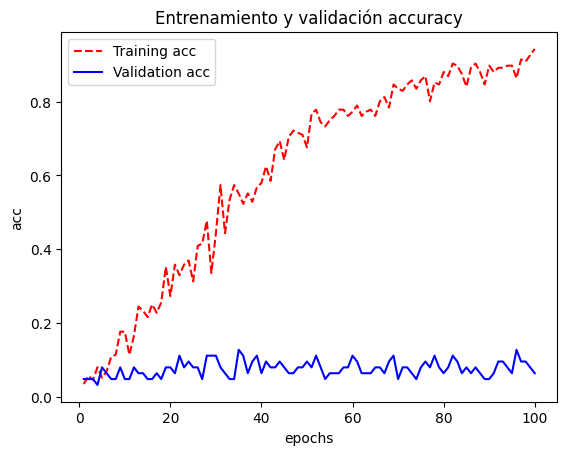

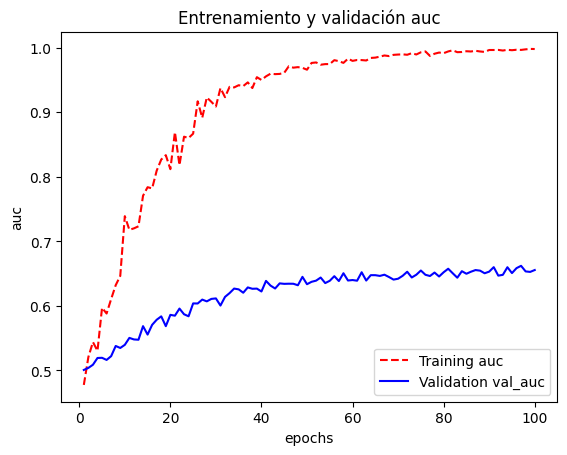

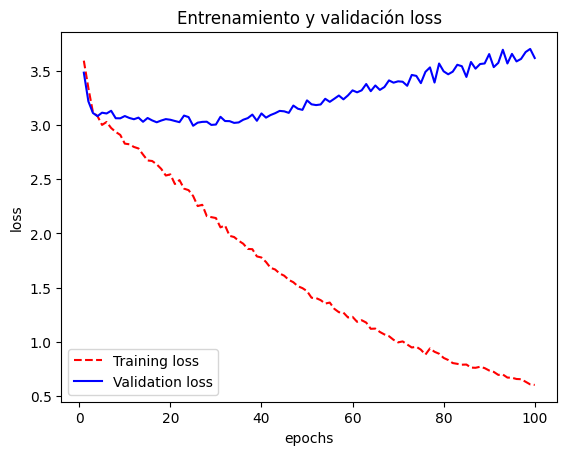

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc      = H3.history[     'accuracy' ]
val_acc  = H3.history[ 'val_accuracy' ]
loss     = H3.history[    'loss' ]
val_loss = H3.history['val_loss' ]
auc = H3.history["auc"]
val_auc = H3.history['val_auc']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Entrenamiento y validación accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     auc, 'r--', label='Training auc'  )
plt.plot ( epochs, val_auc,  'b', label='Validation val_auc')
plt.title ('Entrenamiento y validación auc')
plt.ylabel('auc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' , label='Training loss'  )
plt.plot ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Entrenamiento y validación loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

#**Distribuición de etiquetas del dataset test y train**

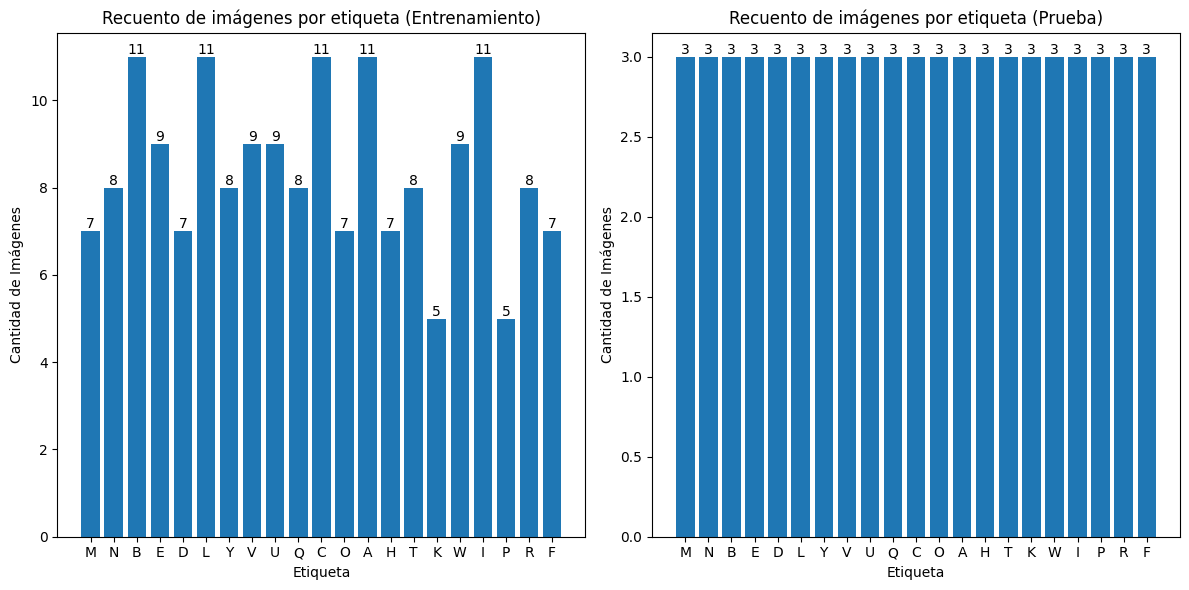

In [ ]:
import os
import matplotlib.pyplot as plt

carpeta_destino_train = "/content/dataset/train"
carpeta_destino_test = "/content/dataset/test"


train_counts = {}
test_counts = {}


for etiqueta in os.listdir(carpeta_destino_train):
    train_counts[etiqueta] = len(os.listdir(os.path.join(carpeta_destino_train, etiqueta)))


for etiqueta in os.listdir(carpeta_destino_test):
    test_counts[etiqueta] = len(os.listdir(os.path.join(carpeta_destino_test, etiqueta)))


plt.figure(figsize=(12, 6))

plt.subplot(121)
bars = plt.bar(train_counts.keys(), train_counts.values())
plt.title('Recuento de imágenes por etiqueta (Entrenamiento)')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad de Imágenes')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.subplot(122)
bars = plt.bar(test_counts.keys(), test_counts.values())
plt.title('Recuento de imágenes por etiqueta (Prueba)')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad de Imágenes')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()